In [4]:
import pandas as pd

In [69]:
# Read from CSV to Pandas DataFrame
# the files should be uploaded in the colab files. 
file1 = "Mousa.csv"
file2 = "Mousa_2017-2021.csv"
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
#df1 = pd.read_csv(url1, index_col=0)
#df2 = pd.read_csv(url2, index_col=0)

In [70]:
df1.shape

(43824, 10)

In [71]:
df2.shape

(2456, 4)

In [72]:
df2= df2.drop(columns="TAGNAME") # no need for it

In [73]:
df2["TIME"]=pd.to_datetime(df2["TIME"]) # change the datatype 
df1["time"]=pd.to_datetime(df1["time"]) # change the datatype 

In [74]:
df1=df1.drop(columns=["latitude","longitude"]) # no need for these two features

In [75]:
import datetime as dt

In [76]:
df1.dtypes

time             datetime64[ns]
Temp 2m                 float64
Dewpoint 2m             float64
Pressure                float64
Precipitation           float64
GHI                     float64
DHI                     float64
BNI                     float64
dtype: object

In [77]:
# in Mousa.csv, we want to exract hour, minute, second, day, month, year. Each 
# in a seprate columne.

df1['hour']=df1["time"].dt.hour
df1['minute']=df1["time"].dt.minute
df1['second']=df1["time"].dt.second
df1['year']=df1["time"].dt.year
df1['month']=df1["time"].dt.month
df1['day']=df1["time"].dt.day

In [78]:
# in Mousa_2017-2021.csv, we want to exract hour, minute, second, day, month, year. Each 
# in a seprate columne.


df2['hour']=df2["TIME"].dt.hour
df2['minute']=df2["TIME"].dt.minute
df2['second']=df2["TIME"].dt.second
df2['year']=df2["TIME"].dt.year
df2['month']=df2["TIME"].dt.month
df2['day']=df2["TIME"].dt.day

In [79]:
# the idea here is: we have to dataset, the first dataset has features of sun angle and when the sensor is on/off in a second interval. the second
# dataset has info about the weather in an hourly interal

# therefore, it so useful to merge the weather features to the on off events only.




temp = pd.merge(df1,df2,on=['hour','year','month','day'])

In [80]:
temp

,time,Temp 2m,Dewpoint 2m,Pressure,Precipitation,GHI,DHI,BNI,hour,minute_x,second_x,year,month,day,TIME,SUNANGLE,VALUE,minute_y,second_y
0,2020-01-01 09:00:00,8.284569,6.106977,101469.238238,0.000041,5.9203,5.9203,0.0,9,0,0,2020,1,1,2020-01-01 09:22:24,0.794701,Off,22,24
1,2020-01-01 15:00:00,8.657693,6.650865,101094.591085,0.000002,0.0000,0.0000,0.0,15,0,0,2020,1,1,2020-01-01 15:14:58,-0.609025,On,14,58
2,2020-01-02 09:00:00,9.637627,6.106977,99488.362429,0.000045,5.6391,5.6391,0.0,9,0,0,2020,1,2,2020-01-02 09:30:09,1.350653,Off,30,9
3,2020-01-02 15:00:00,9.466230,6.505375,98939.398205,0.000017,0.0000,0.0000,0.0,15,0,0,2020,1,2,2020-01-02 15:27:20,-1.299217,On,27,20
4,2020-01-03 09:00:00,5.377134,1.206551,100122.093188,0.000103,6.5493,6.5493,0.0,9,0,0,2020,1,3,2020-01-03 09:00:19,-0.601137,Off,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2019-12-29 15:00:00,10.276099,7.900873,100948.970751,0.000106,0.0000,0.0000,0.0,15,0,0,2019,12,29,2019-12-29 15:20:56,-1.216804,On,20,56
2452,2019-12-30 09:00:00,8.761237,4.632564,100973.106875,0.000003,5.5008,5.5008,0.0,9,0,0,2019,12,30,2019-12-30 09:02:56,-0.538362,Off,2,56
2453,2019-12-30 15:00:00,7.942024,4.656771,101158.229751,0.000104,0.0000,0.0000,0.0,15,0,0,2019,12,30,2019-12-30 15:32:08,-1.826441,On,32,8
2454,2019-12-31 08:00:00,8.598426,3.095730,102691.170818,0.000058,0.0000,0.0000,0.0,8,0,0,2019,12,31,2019-12-31 08:52:58,-1.148608,Off,52,58


In [82]:
#using map function, to change on off to 1 and 0

temp["VALUE"]= temp["VALUE"].map({'On':1,'Off':0})

In [83]:
temp['VALUE']=temp['VALUE'].astype('int') # cnange the data type to integer

In [84]:
temp.to_csv("after_clean.csv", index=False) # good to have a copy of merged datasets. 

In [85]:
temp.VALUE.dtype

dtype('int64')

In [86]:
temp.columns

Index(['time', 'Temp 2m', 'Dewpoint 2m', 'Pressure', 'Precipitation', 'GHI',
       'DHI', 'BNI', 'hour', 'minute_x', 'second_x', 'year', 'month', 'day',
       'TIME', 'SUNANGLE', 'VALUE', 'minute_y', 'second_y'],
      dtype='object')

In [87]:
#  prepare the training data. 

In [88]:
y=temp.VALUE
np.shape(y)

(2456,)

In [89]:
features = ['Temp 2m', 'Dewpoint 2m', 'Pressure', 'Precipitation', 'GHI',
            'DHI', 'BNI', 'hour', 'year', 'month', 'day',
            'SUNANGLE', 'minute_y', 'second_y']

In [90]:
X =temp[features]
X.head()

,Temp 2m,Dewpoint 2m,Pressure,Precipitation,GHI,DHI,BNI,hour,year,month,day,SUNANGLE,minute_y,second_y
0,8.284569,6.106977,101469.238238,0.000041,5.9203,5.9203,0.0,9,2020,1,1,0.794701,22,24
1,8.657693,6.650865,101094.591085,0.000002,0.0000,0.0000,0.0,15,2020,1,1,-0.609025,14,58
2,9.637627,6.106977,99488.362429,0.000045,5.6391,5.6391,0.0,9,2020,1,2,1.350653,30,9
3,9.466230,6.505375,98939.398205,0.000017,0.0000,0.0000,0.0,15,2020,1,2,-1.299217,27,20
4,5.377134,1.206551,100122.093188,0.000103,6.5493,6.5493,0.0,9,2020,1,3,-0.601137,0,19


In [91]:
X.columns

Index(['Temp 2m', 'Dewpoint 2m', 'Pressure', 'Precipitation', 'GHI', 'DHI',
       'BNI', 'hour', 'year', 'month', 'day', 'SUNANGLE', 'minute_y',
       'second_y'],
      dtype='object')

In [92]:
X.dtypes

Temp 2m          float64
Dewpoint 2m      float64
Pressure         float64
Precipitation    float64
GHI              float64
DHI              float64
BNI              float64
hour               int64
year               int64
month              int64
day                int64
SUNANGLE         float64
minute_y           int64
second_y           int64
dtype: object

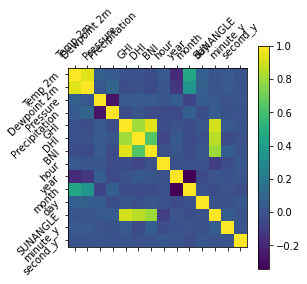

In [93]:
# Exploratory data analysis (EDA)

import matplotlib.pyplot as plt

# Correlation matrix
plt.matshow(X.corr())
continuous_features = X.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()

In [94]:
# Rows with at least one NaN value
import numpy as np
import pandas as pd
X[pd.isnull(X).any(axis=1)].head()

,Temp 2m,Dewpoint 2m,Pressure,Precipitation,GHI,DHI,BNI,hour,year,month,day,SUNANGLE,minute_y,second_y


In [95]:
# get the number of missing data points per column
missing_values_count = X.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

#there is no missing values at all. 

Temp 2m          0
Dewpoint 2m      0
Pressure         0
Precipitation    0
GHI              0
DHI              0
BNI              0
hour             0
year             0
month            0
day              0
SUNANGLE         0
minute_y         0
second_y         0
dtype: int64

In [96]:
# 3 ML models:

#--------------------------


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Divide data into training and validation subsets
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)



In [ ]:
# 1- logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
# define Model
logModel = LogisticRegression(max_iter=5000)
#fit Model
logModel.fit(train_X, train_y)


# get predicted prices on validation data
val_predictions = logModel.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

lr_mae= mean_absolute_error(val_y, val_predictions)

0.01016260162601626


In [ ]:
# 2- SVM model "Support Vector Machines"

In [101]:
from sklearn.svm import SVC

#define Model
SVM_Model = SVC(gamma='auto')
# fit model
SVM_Model.fit(train_X,train_y)

# get predicted prices on validation data
val_predictions = SVM_Model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


svm_mae= mean_absolute_error(val_y, val_predictions)

0.5223577235772358


In [102]:
# 3- DecisionTreeClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)

In [103]:
# Define model
model = RandomForestClassifier(n_estimators=500)
# Fit model
model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

rfc_mae = mean_absolute_error(val_y, val_predictions)

0.018292682926829267


In [105]:
#4- XGBoost- XGBClassifier
from xgboost import XGBClassifier
#define model
XGB_model = XGBClassifier(n_estimators=500)
# fit model
XGB_model.fit(train_X, train_y)
# get predicted prices on validation data
val_predictions = XGB_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

xgb_mae = mean_absolute_error(val_y, val_predictions)

0.018292682926829267


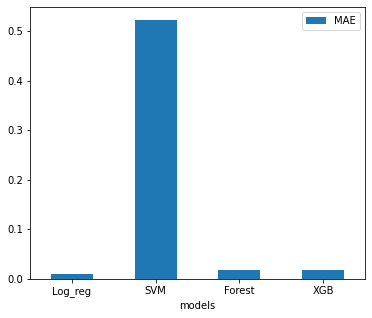

In [133]:
df = pd.DataFrame({'models':['Log_reg', 'SVM', 'Forest', 'XGB'], 'MAE':[lr_mae,svm_mae, rfc_mae, xgb_mae]})
ax = df.plot.bar(x="models", y="MAE", rot=0, figsize=(6,5))


In [68]:
# Since the Logistic Regression has the least mean absolute error on testing


# I will choose 
# Logistic Regression, he is the winner in our case. 

In [68]:
# The End

# hope I completed the tasks, successfully. 

# Bests, 
#Adel